In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)
lat_lngs = [pair for pair in zip(lats, lngs)]
lat_lngs

[(-26.71665827396506, -151.00911079321676),
 (-45.87133949122748, -117.66701125693042),
 (60.85333940395836, -31.238727167087262),
 (72.49051300023567, 19.1360866976176),
 (-27.29074496650027, 137.43378373311498),
 (48.722158743227396, 89.58588368942372),
 (-58.58757696820122, -105.28470890993772),
 (18.403017966276607, -142.60836189433758),
 (77.89937391155675, -102.17895192420346),
 (-28.6037682036796, 4.336577068409298),
 (20.061101247283247, 71.4032886483102),
 (34.244176276367185, -54.0445057248527),
 (-34.57019814135692, -17.652163111747853),
 (39.76689526597224, 12.197269315939081),
 (-35.18363187076121, -32.079920402881925),
 (67.68159189089903, 74.91650345214947),
 (-26.998124444905713, -179.15840298894042),
 (-30.51711490469998, 157.02516658837504),
 (38.77384980907979, -96.20060261352137),
 (17.641131255815452, -15.45193192503757),
 (18.833739646547542, 86.9318339177625),
 (1.834217264161822, 49.75540427050021),
 (-13.370972598534024, 134.31814696957417),
 (89.24381776798052

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-26.71665827396506, -151.00911079321676),
 (-45.87133949122748, -117.66701125693042),
 (60.85333940395836, -31.238727167087262),
 (72.49051300023567, 19.1360866976176),
 (-27.29074496650027, 137.43378373311498),
 (48.722158743227396, 89.58588368942372),
 (-58.58757696820122, -105.28470890993772),
 (18.403017966276607, -142.60836189433758),
 (77.89937391155675, -102.17895192420346),
 (-28.6037682036796, 4.336577068409298),
 (20.061101247283247, 71.4032886483102),
 (34.244176276367185, -54.0445057248527),
 (-34.57019814135692, -17.652163111747853),
 (39.76689526597224, 12.197269315939081),
 (-35.18363187076121, -32.079920402881925),
 (67.68159189089903, 74.91650345214947),
 (-26.998124444905713, -179.15840298894042),
 (-30.51711490469998, 157.02516658837504),
 (38.77384980907979, -96.20060261352137),
 (17.641131255815452, -15.45193192503757),
 (18.833739646547542, 86.9318339177625),
 (1.834217264161822, 49.75540427050021),
 (-13.370972598534024, 134.31814696957417),
 (89.24381776798052

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | tromso
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | kosh-agach
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | diu
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | anzio
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | pangody
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | ballina
Processing Record 19 of Set 1 | emporia
Processing Record 20 of Set 1 | nouakchott
Processing Record 21 of Set 1 | puri
Processing Record 22 of Set 1 | hobyo
Processing Record 23 of Set 1 | maningrida
Proce

Processing Record 39 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 40 of Set 4 | tukrah
Processing Record 41 of Set 4 | marzuq
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | inhambane
Processing Record 44 of Set 4 | ahuimanu
Processing Record 45 of Set 4 | homer
Processing Record 46 of Set 4 | george
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | bairiki
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | loubomo
Processing Record 2 of Set 5 | calama
Processing Record 3 of Set 5 | lodja
Processing Record 4 of Set 5 | verkhnevilyuysk
Processing Record 5 of Set 5 | schwedt
Processing Record 6 of Set 5 | xiaoshi
Processing Record 7 of Set 5 | ravar
Processing Record 8 of Set 5 | galle
Processing Record 9 of Set 5 | port pirie
Processing Record 10 of Set 5 | bembereke
Processing Record 11 of Set 5 | narsaq
Processing Record 12 of Set 5 | bulgan
Proces

Processing Record 29 of Set 8 | huanuco
Processing Record 30 of Set 8 | flinders
Processing Record 31 of Set 8 | acapulco
Processing Record 32 of Set 8 | mikuni
Processing Record 33 of Set 8 | khandyga
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | panalingaan
Processing Record 36 of Set 8 | chuy
Processing Record 37 of Set 8 | henties bay
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | kanniyakumari
Processing Record 40 of Set 8 | santa rosa
Processing Record 41 of Set 8 | dubrovnik
Processing Record 42 of Set 8 | mbandaka
Processing Record 43 of Set 8 | libenge
Processing Record 44 of Set 8 | harper
Processing Record 45 of Set 8 | ibaiti
Processing Record 46 of Set 8 | vega de alatorre
Processing Record 47 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 48 of Set 8 | husavik
Processing Record 49 of Set 8 | susanville
Processing Record 50 of Set 8 | santarem
Processing Record 1 of Set 9 | noumea
Processing Record 2 of Se

Processing Record 18 of Set 12 | mandera
Processing Record 19 of Set 12 | college
Processing Record 20 of Set 12 | bilma
Processing Record 21 of Set 12 | taua
Processing Record 22 of Set 12 | bajil
Processing Record 23 of Set 12 | kysyl-syr
Processing Record 24 of Set 12 | worgl
Processing Record 25 of Set 12 | pacific grove
Processing Record 26 of Set 12 | ulladulla
Processing Record 27 of Set 12 | khash
Processing Record 28 of Set 12 | suileng
Processing Record 29 of Set 12 | ndioum
Processing Record 30 of Set 12 | sokolo
Processing Record 31 of Set 12 | olafsvik
Processing Record 32 of Set 12 | voskresenskoye
Processing Record 33 of Set 12 | cherdyn
Processing Record 34 of Set 12 | hihifo
City not found. Skipping...
Processing Record 35 of Set 12 | fort nelson
Processing Record 36 of Set 12 | marinette
Processing Record 37 of Set 12 | malangali
Processing Record 38 of Set 12 | sindor
Processing Record 39 of Set 12 | hay river
Processing Record 40 of Set 12 | charters towers
Processi

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,62.29,43,0,8.59,NZ,2021-02-04 05:19:23
1,Rikitea,-23.1203,-134.9692,78.19,71,0,13.33,PF,2021-02-04 05:19:34
2,Tasiilaq,65.6145,-37.6368,16.18,89,34,10.38,GL,2021-02-04 05:20:02
3,Tromso,69.6496,18.9570,30.20,86,75,9.22,NO,2021-02-04 05:20:48
4,Alice Springs,-23.7000,133.8833,96.80,21,40,18.41,AU,2021-02-04 05:21:36
5,Kosh-Agach,50.0000,88.6667,11.68,89,100,2.08,RU,2021-02-04 05:25:16
6,Punta Arenas,-53.1500,-70.9167,60.80,72,90,25.32,CL,2021-02-04 05:19:25
7,Hilo,19.7297,-155.0900,75.20,69,90,4.61,US,2021-02-04 05:19:24
8,Yellowknife,62.4560,-114.3525,-18.99,69,90,9.22,CA,2021-02-04 05:19:45
9,Luderitz,-26.6481,15.1594,64.69,71,0,12.91,NA,2021-02-04 05:19:49


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-02-04 05:19:23,-46.1927,168.8643,62.29,43,0,8.59
1,Rikitea,PF,2021-02-04 05:19:34,-23.1203,-134.9692,78.19,71,0,13.33
2,Tasiilaq,GL,2021-02-04 05:20:02,65.6145,-37.6368,16.18,89,34,10.38
3,Tromso,NO,2021-02-04 05:20:48,69.6496,18.9570,30.20,86,75,9.22
4,Alice Springs,AU,2021-02-04 05:21:36,-23.7000,133.8833,96.80,21,40,18.41
...,...,...,...,...,...,...,...,...,...
585,Krasnaya Gora,RU,2021-02-04 05:20:26,52.9995,31.6023,33.80,93,90,8.95
586,San Carlos,VE,2021-02-04 05:27:46,9.6612,-68.5827,76.77,62,50,3.91
587,Saverne,FR,2021-02-04 05:27:46,48.8333,7.2500,44.60,81,75,6.91
588,Tilichiki,RU,2021-02-04 05:20:13,60.4667,166.1000,17.46,97,90,9.17


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

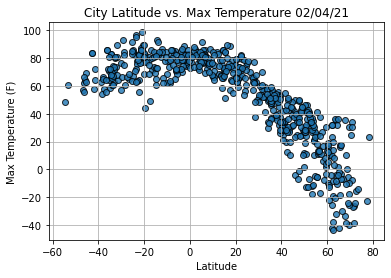

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

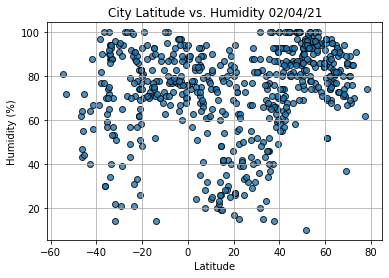

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

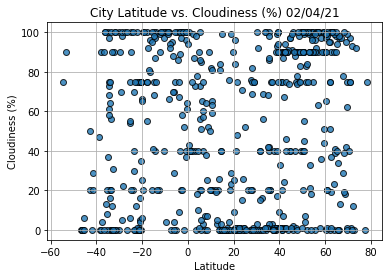

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

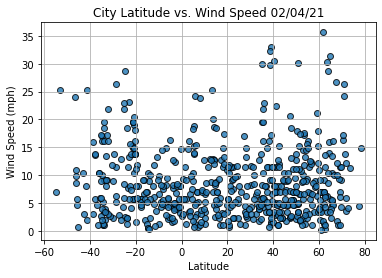

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
    
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Anzio
Country                        IT
Date          2021-02-04 05:25:17
Lat                       41.4853
Lng                       12.6179
Max Temp                       55
Humidity                       82
Cloudiness                     87
Wind Speed                   5.01
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
585     True
586     True
587     True
588     True
589     True
Name: Lat, Length: 590, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Tasiilaq,GL,2021-02-04 05:20:02,65.6145,-37.6368,16.18,89,34,10.38
3,Tromso,NO,2021-02-04 05:20:48,69.6496,18.9570,30.20,86,75,9.22
5,Kosh-Agach,RU,2021-02-04 05:25:16,50.0000,88.6667,11.68,89,100,2.08
7,Hilo,US,2021-02-04 05:19:24,19.7297,-155.0900,75.20,69,90,4.61
8,Yellowknife,CA,2021-02-04 05:19:45,62.4560,-114.3525,-18.99,69,90,9.22


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

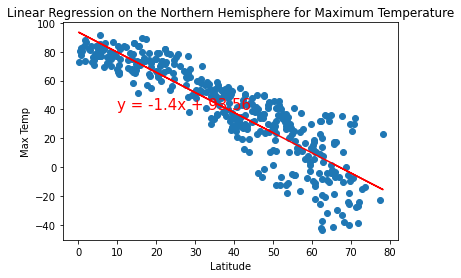

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

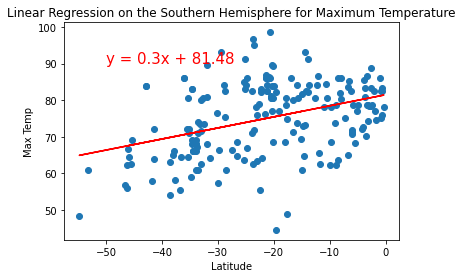

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

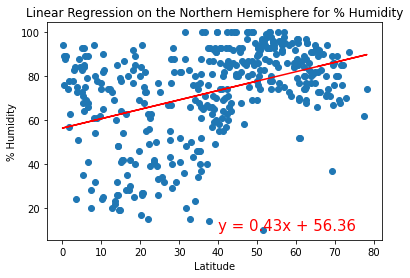

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

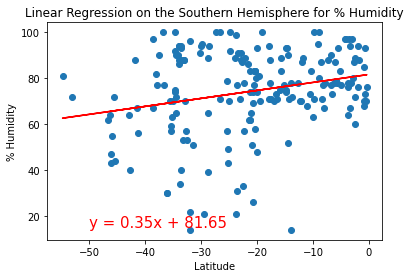

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

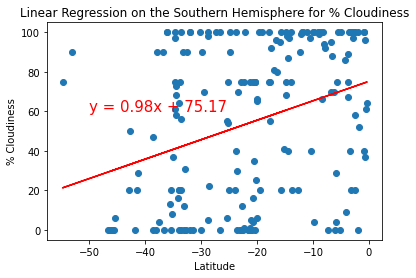

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

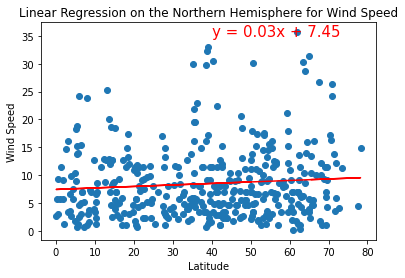

In [36]:
# Linear regression on the Northern Hemisphere
# comment
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

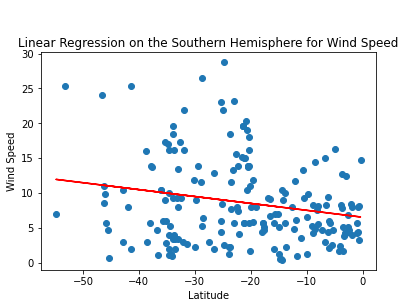

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))